# Introduktion till Numpy för otåliga Matlabanvändare

Den här handledningen är en kortfattad introduktion till Python med Numpy för den som kommer från Matlab.

Det första som vi ska konstatera efter att ha installerat rasket med hjälp av Anaconda
är att installationen skriver i __.zshrc__. Eftersom det skriver sist i filen så och
ändrar prompten så får man editera filen och ändta tillbaks promten igen. Usch. 
Jag avskyr massa skit i promten.

    PS1='> '

### Uttryck

Om man inte avslutar med semikolon så skriver Python ut resultatet som i Matlab, men inte om tilldelning till variabel sker. Notera att strängkonkatenering sker med operatorn __+__ och att man explicit måste konvertera nummer till sträng för utskrift. Urk.

In [432]:
x = 3 * 11.5 + 2.3 ** 2 / 4
print("x has value " + str(x))

x has value 35.8225


Python har kommandon för att lista variabler på diverse sätt. De är helt värdelösa för normalt bruk. Istället får man hoppas att man kör __IPython__, för då finns _magic commands_ som alltid börjar med ett procenttecken och inte har parenteser för anrop. Harreminje. Men vilken tur att det finns ett magiskt kommando __%who__. 

In [433]:
%who

A	 B	 D	 E	 S	 U	 V	 X	 Y	 
a	 ax	 b	 d	 fig	 lst	 np	 plt	 rank	 
ratio	 res	 scale	 v	 x	 x_left	 x_right	 y	 y_high	 
y_low	 


Python har __del__-kommandot för att radera variabler. Det har också ett unikt __None__-objekt. 
En variable försvinner alltså _INTE_ om man tilldelar variabeln det objektet. 

In [434]:
a, b, c, d = 1, 2, 3, 4
b = None
del c
%who

A	 B	 D	 E	 S	 U	 V	 X	 Y	 
a	 ax	 b	 d	 fig	 lst	 np	 plt	 rank	 
ratio	 res	 scale	 v	 x	 x_left	 x_right	 y	 y_high	 
y_low	 


Hjälpfunktionen __help__ är mycket användbar, 
men den skriver ut så mycket att man hellre har den i ett terminalfönster än i Jupyter,
så vi ger inget exempel här.

### Numpy

För __sin__ och __sqrt__ och liknande och matriser så laddar man in Numpy. Alla verkar döpa det till __np__.

In [435]:
import numpy as np
v = np.pi / 4
print(np.sin(v))

0.7071067811865475


### Skapa matriser och vektorer

Först ska vi konstatera att man _inte_ ska använda __np.matrix__. Här är ett citat från Stackoverflow.

> Note that while you can use numpy.matrix (as of early 2021) where it will be treated
like standard matrix multiplication, numpy.matrix is deprecated and may be removed in
future releases.

Så vi ska alltså använda __np.array__ istället. Inargument är en lista av listor. Man kan ge en sträng för mer Matlablik notation om man anstränger sig men det ska man nog undvika.

In [436]:
x = np.array([[2, 0, 9],[7, 6, 2]])
y = np.array([[1, 2, 3],[0, 0, 3]])
x + y

array([[ 3,  2, 12],
       [ 7,  6,  5]])

Enhetsmatriser och nollmatriser och annat godis kan användas för att bygga matriser. Metoden __np.array__ fattar
inte listor av matriser. Det är dumt. 
Notera att dimensionen till __zeros__ och __ones__ anges med en tuple. Vi kan konstatera att Python kräver mycket mer trycksvärta än Matlab.

In [437]:
np.concatenate([
    np.concatenate([np.eye(2), np.zeros((2,3))], axis = 1),
    np.concatenate([np.ones((2,3)), [[3, 5],[2, 7]]], axis = 1)
], axis = 0)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 1., 1., 3., 5.],
       [1., 1., 1., 2., 7.]])

Till skillnad från __zeros__ ovan skall dimensionen till __randn__ _inte_
anges som en tuple. Det är inte särskilt konsekvent.

In [438]:
np.random.randn(2, 3)

array([[-1.12920354, -1.07539877,  1.06637787],
       [ 1.17519489, -1.92360558, -1.16964403]])

Matlabnotationen __1:2:9__ skrivs om så här. Nästan.

In [439]:
np.arange(1, 9, 2)

array([1, 3, 5, 7])

Vi konstaterar två saker. För det första fick vi inte med nian på slutet. För det andra så är vektorn inte
en radvektor eller kolonnvektor. Den har bara en dimension. Fast när man indexerar så
liknar notationen Matlab. Men Pythons index börjar på 0. Nu förstår vi slutligen följande.

In [462]:
x = np.array([42, 48, 43, 99, 33])
x[1:4]

array([48, 43, 99])

### Operationer på matriser

De vanliga operationerna tolkas elementvis. Det finns metodnamn så __+__ tolkas som __np.add__ osv men det kan vi strunta i.

In [441]:
A = np.array([[2,3],[1,4]])
B = np.array([[7,5],[9,8]])
print(A)
print('--------')
print(B)

[[2 3]
 [1 4]]
--------
[[7 5]
 [9 8]]


In [442]:
print(A + B)
print('--------')
print(A * B)

[[ 9  8]
 [10 12]]
--------
[[14 15]
 [ 9 32]]


Matrismultiplikation kommer i två varianter __dot__ och __matmul__. Vi citerar Pythons dokumentation

> __matmul__ differs from __dot__ in two important ways.
> * Multiplication by scalars is not allowed.
> * Stacks of matrices are broadcast together as if the matrices were elements.

I nyare Python så fungerar kanelbulle __@__ som __matmul__.

In [443]:
A @ B

array([[41, 34],
       [43, 37]])

In [444]:
B @ A

array([[19, 41],
       [26, 59]])

In [445]:
A @ B.transpose()

array([[29, 42],
       [27, 41]])

### Operationer på vektorer

Vektorer är _inte_ radvektorer eller kolonvektorer (om vi inte trixar).

In [446]:
x = np.array([4, 2])
A @ x

array([14, 12])

Jaha, det tolkades som en kolonnvektor. Nu multiplicerar vi från vänster.

In [447]:
x @ A

array([10, 20])

Nu tolkades det som en radvektor.

In [448]:
x @ x

20

Nu blev det inre produkt. Så kan det gå.

### print

Om man vill skriva ut en matris som man vill ha den, utan hakparenteser, komman och annan skit så får man googla på Stackoverflow och formattera själv.

In [1]:
# Har inte lyckats hittils

### Lista som array

Eftersom vi listar det vi upplever som märkligt och bisarrt när vi kommer från Matlab så ska vi se hur 
linalgoperatorerna reagerar när de får en lista i ställer för en array.

In [449]:
x = [42, 99]
y = np.array(x)
x @ y, y @ x

(11565, 11565)

Jaha, av någon märklig anledning gick det bra. Men __x @ x__ går inte, för då blir det exekveringsfel. Vi ska inte generera fel för då bryter Jupyter exekveringen om man kör _run all_. Men __matmul__ går bra trots att vi sa att __@__ var samma sak som __matmul__. 

In [450]:
np.matmul(x, x)

11565

Jaså, det köpte den. Här börjar vi närma oss __Perl__ i obegripligt dåligt uppförande och avstår från att gissa vad som händer i nästa version av Python.

### Linjära ekvationssystem

Metoden __lstsq__ löser ekvationsystem. 
Funkar också om det är över- eller underbestämt. Det är ett hoopla om __rcond__, se dokumentationen.
Returvärdet är en tuple med en massa information.

In [451]:
A = np.random.randn(9, 2)
Y = np.random.randn(9)
(X, res, rank, S) = np.linalg.lstsq(A, Y, rcond = -1)
X, res, rank, S

(array([-0.19033322,  0.09872187]),
 array([8.10846021]),
 2,
 array([2.99549003, 2.29238474]))

### Principalkomponenter

Antag att vi har en symmetrisk matris. 

In [452]:
X = np.random.randn(3, 3)
X = np.dot(X, X.transpose())
print(X)

[[ 1.00109252  0.53193525  1.80877694]
 [ 0.53193525  1.75987698 -0.13355508]
 [ 1.80877694 -0.13355508  5.90617472]]


Såja, det är en fin symmetrisk matris. Vad har den för evenvärden måntro?

In [453]:
(U, E, V) = np.linalg.svd(X, hermitian = True)
print(E)
print('------------------------------')
print(U)

[6.50136053 1.95300304 0.21278064]
------------------------------
[[ 0.31311436  0.31417999  0.89624234]
 [ 0.00837758  0.94274523 -0.33340852]
 [ 0.94967848 -0.11190334 -0.292555  ]]


Nu följer en koll att det blev rätt.

In [463]:
np.max(X - U @ np.diag(E) @ V)

2.220446049250313e-16

### Plotta

Modulen __matplotlib__ är den som används flitigt.

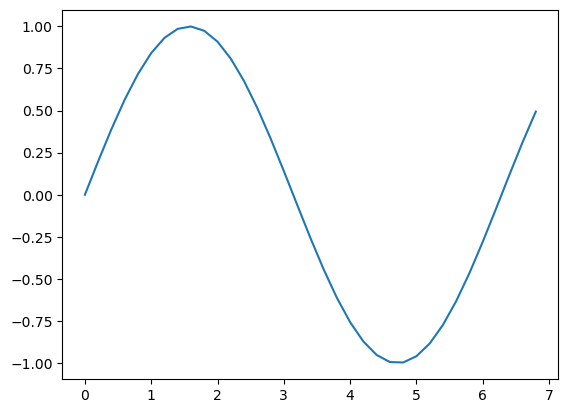

In [456]:
import matplotlib.pyplot as plt
x = np.arange(0, 7, 0.2)
y = np.sin(x)
plt.plot(x,y)
plt.show()

Nu ska vi se om vi kan göra den lite mindre på höjden. Det kanske ser snyggare ut på skärmen. Vi demonstrerar plot med punkter och grid samtidigt.

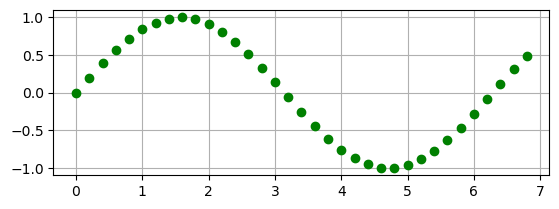

In [459]:
fig, ax = plt.subplots()
ax.plot(x, y, "og")
ratio = 1 / 3
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
ax.grid()
plt.show()